# Dicionário de Variáveis

- PassengerID: Número de identificação do passageiro;
- Survived: Informa se o passageiro sobreviveu ao naufrágio (0 = não e 1 = sim).
- PCclass: Classe do bilhete (1 = 1ª classe; 2 = 2ª classe e 3 = 3ª classe);
- Name: Nome do passageiro;
- Sex: Sexo do passageiro;
- Age: Idade do passageiro;
- SibSp: Quantidade de cônjuges e/ou irmãos a bordo;
- Parch: Quantidade de pais e filhos a bordo;
- Ticket: Número da passagem;
- Fare: Preço da passagem;
- Cabin: Número da cabine do passageiro;
- Embarked: Porto de embarque: (C = Cherbourg; Q = Queenstown; S = Southampton);

# Bibliotecas

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Carregando Dados

In [5]:
df = pd.read_csv("dataset/train.csv", index_col = "PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Engenharia de Atributos

## Sex

- Transformando Categórico do tipo String para Int

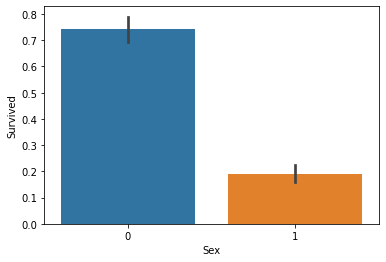

In [6]:
df['Sex'] = df['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

## Cabin

- As cabines são compostas por uma letra e números, onde a letra indica o setor da cabine.
- Os valores nulos nas cabines podem ser tratatos como um setor distinto

In [7]:
def setor(cabine, setores):
    for char in setores: 
        if(str(cabine).find(char) != -1):
            return char # Retorna a letra quando encontrada
    return 'U' # Não tem Cabine

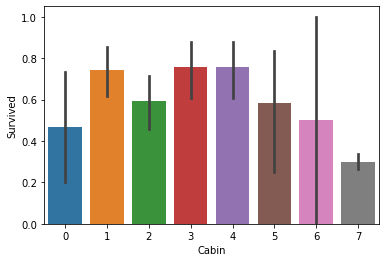

In [8]:
setores = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z']

df['Cabin'] = df['Cabin'].map(lambda x: setor(x, setores))
le_cabin = LabelEncoder()

df['Cabin'] = le_cabin.fit_transform(df['Cabin'])

sns.barplot(x="Cabin", y="Survived", data=df)
plt.show()

## Embarked

- Todos os valores nulos serão substituídos pela porto mais comum
- Os valores são transformados em inteiros

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

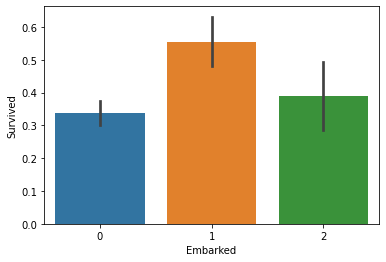

In [9]:
df['Embarked'] = df['Embarked'].fillna('S') # é o mais comum 
df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

sns.barplot(x="Embarked", y="Survived", data=df)

## Fare

- Categorizar o preço das passagens em 4 valores que foram testados aleatoriamente

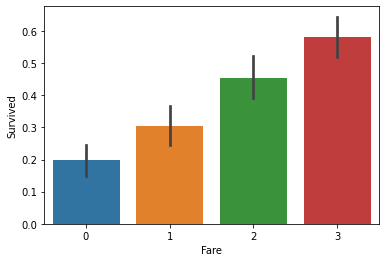

In [10]:
ser_fare, bins_fare = pd.qcut(df["Fare"], 4, retbins=True, labels=False)
df['Fare'] = pd.cut(df["Fare"], bins=bins_fare, labels=False, include_lowest=True)
sns.barplot(x = df['Fare'], y = df['Survived'])
plt.show()

## Name

- Extrair os pronomes de tratamento
- **Criar uma nova coluna** contendo o Pronome de Tratamento
- **Remover o Nome**
- Senhor: Sir/ Mr / Don / Jonkheer / Dr / Rev .
- Senhora casada: Madam/ Mrs / Ms / Mme (em frânces) / Countess (condessa).
- Mulher solteira/senhorita/menina: Miss, Mlle (mademoiselle).
- Meninos (formalmente): Master
- Tripulantes : Major / capt / col

In [11]:
def pronomes(x):
    if 'Mr' in x:
        return 'Mr'
    elif 'Don' in x:
        return 'Mr'
    elif 'Mrs' in x:
        return 'Mrs'
    elif 'Ms' in x:
        return 'Mrs'
    elif 'Mme' in x:
        return 'Mrs'
    elif 'Miss' in x:
        return 'Miss'
    elif 'Mlle' in x:
        return 'Miss'
    elif 'Dr' in x:
        return 'Mr'
    elif 'Rev' in x:
        return 'Mr'
    elif 'Master' in x:
        return 'Master'
    elif 'Major' in x:
        return 'Sea'
    elif 'Capt' in x:
        return 'Sea'
    elif 'Jonkheer' in x:
        return 'Mr'
    elif 'Col' in x:
        return 'Sea'
    elif 'Countess' in x:
        return 'Mrs'
    else:
        return 'None'

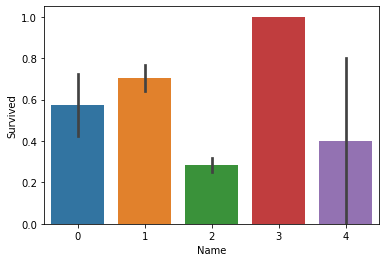

In [12]:
df['Name'] = df['Name'].apply(pronomes)

le_name = LabelEncoder()

df['Name'] = le_name.fit_transform(df['Name'])


sns.barplot(x = df['Name'], y = df['Survived'])
plt.show()

## Age

- Categorizar a idade de acordo com a faixa de idade separando em crianças 0 e Outros em 1

In [13]:
def age(x):
    if(x < 7):
        return 0
    else:
        return 1    

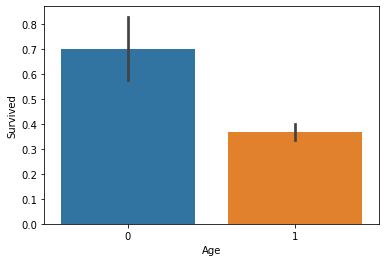

In [14]:
df['Age'] = df['Age'].apply(age)
sns.barplot(x = df['Age'], y = df['Survived'])
plt.show()

## Ticket

- Remover a Coluna Ticket

In [15]:
df = df.drop(columns='Ticket')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,2,1,1,1,0,0,7,0
2,1,1,2,0,1,1,0,3,2,1
3,1,3,1,0,1,0,0,1,7,0
4,1,1,2,0,1,1,0,3,2,0
5,0,3,2,1,1,0,0,1,7,0


## Mapa de Correlação Final

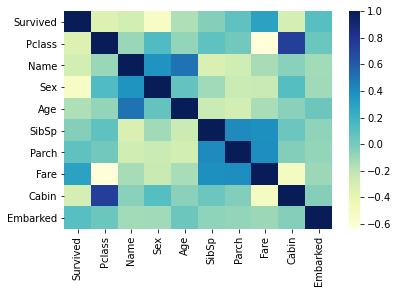

In [16]:
sns.heatmap(df.corr(), cmap="YlGnBu") 
plt.show() 

# Tratamento dos Dados de Teste

In [32]:
valid = pd.read_csv("dataset/test.csv", index_col = "PassengerId")
valid.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [33]:
# Sex
valid['Sex'] = valid['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

# Cabin
valid['Cabin'] = valid['Cabin'].map(lambda x: setor(x, setores))
valid['Cabin'] = le_cabin.fit_transform(valid['Cabin'])

# Embarked
valid['Embarked'] = valid['Embarked'].fillna('S') # é o mais comum 
valid['Embarked'] = valid['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

# Fare
valid['Fare'] = pd.cut(valid["Fare"], bins=bins_fare, labels=False, include_lowest=True)
valid['Fare'] = valid['Fare'].fillna(1)
valid['Fare'] = valid['Fare'].astype(int)

# Name
valid['Name'] = valid['Name'].apply(pronomes)
valid['Name'] = le_name.fit_transform(valid['Name'])

# Age
valid['Age'] = valid['Age'].apply(age)

# Ticket
valid = valid.drop(columns='Ticket')

valid.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
892,3,2,1,1,0,0,0,7,2
893,3,2,0,1,1,0,0,7,0
894,2,2,1,1,0,0,1,7,2
895,3,2,1,1,0,0,1,7,0
896,3,2,0,1,1,1,1,7,0
897,3,2,1,1,0,0,1,7,0
898,3,1,0,1,0,0,0,7,2
899,2,2,1,1,1,1,2,7,0
900,3,2,0,1,0,0,0,7,1


# Salvando Dataframes

In [34]:
df.to_csv('train_.csv', encoding='utf-8', index=False)
valid.to_csv('test_.csv', encoding='utf-8', index_label='PassengerId')

In [35]:
valid = pd.read_csv("test_.csv")
valid.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,2,1,1,0,0,0,7,2
1,893,3,2,0,1,1,0,0,7,0
2,894,2,2,1,1,0,0,1,7,2
3,895,3,2,1,1,0,0,1,7,0
4,896,3,2,0,1,1,1,1,7,0
